In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandasql as psql
pd.set_option('display.max_columns',None)
                        

In [2]:
# Load the general dataset

unemployment = pd.read_csv(r"C:\Users\sruth\Downloads\Unemployment in India.csv", header=0)

# Copy to back-uo file

unemployment_01 = unemployment.copy()

# Display first 5 records

unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
unemployment['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [7]:
unemployment.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
unemployment.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [15]:
unemployment=unemployment.rename({' Date':'Date',' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Estimated_Unemployment_Rate_(%)',' Estimated Employed':'Estimated_Employed',' Estimated Labour Participation Rate (%)':'Estimated_Labour_Participation_Rate_(%)'}, axis=1)
unemployment.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [16]:
unemployment_d=unemployment[unemployment.duplicated(keep='last')]
unemployment_d

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
unemployment=unemployment.dropna()

In [19]:
unemployment.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated_Unemployment_Rate_(%)            0
Estimated_Employed                         0
Estimated_Labour_Participation_Rate_(%)    0
Area                                       0
dtype: int64

In [20]:
unemployment['Date']=pd.to_datetime(unemployment['Date'])

In [21]:
unemployment['year']=pd.DatetimeIndex(unemployment['Date']).year
unemployment['month']=pd.DatetimeIndex(unemployment['Date']).month
unemployment['day']=pd.DatetimeIndex(unemployment['Date']).day
unemployment.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area,year,month,day
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5,31
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6,30
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7,31
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8,31
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9,30


In [22]:
del unemployment['Frequency']

In [23]:
unemployment.shape

(740, 9)

In [24]:
unemployment.head()

,Region,Date,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area,year,month,day
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,5,31
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,6,30
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,7,31
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,8,31
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,9,30


In [25]:
unemployment.columns

Index(['Region', 'Date', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Area',
       'year', 'month', 'day'],
      dtype='object')

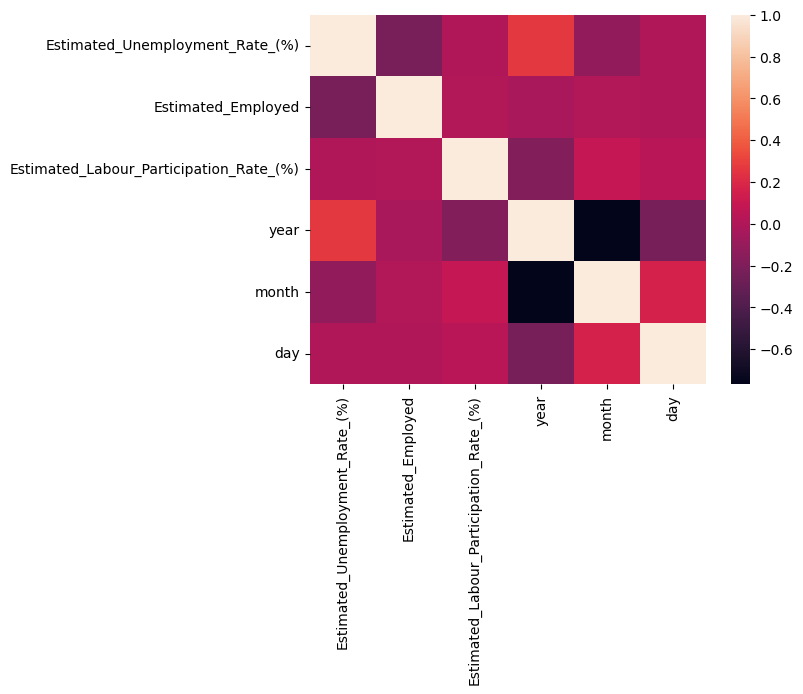

In [39]:
correlation = unemployment.corr()
sns.heatmap(correlation, annot=False)
# Show the plots
plt.show()

In [31]:
unemployment.Area.value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

<Axes: xlabel='Area', ylabel='count'>

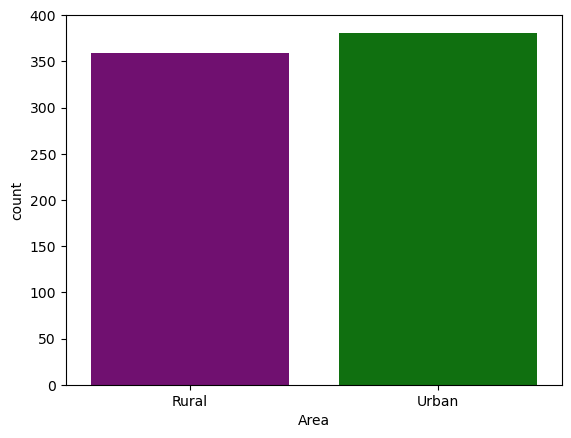

In [35]:
sns.countplot(x='Area',data=unemployment,palette=['purple','green']) 

In [41]:
unemployment.Area.value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

<Axes: xlabel='count', ylabel='Area'>

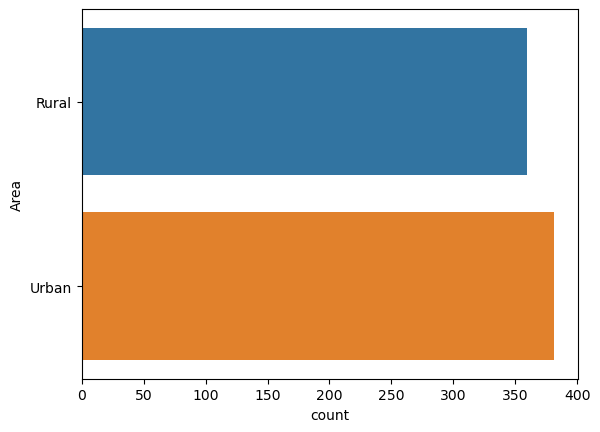

In [43]:
sns.countplot(y='Area',data=unemployment)

<Axes: title={'center': 'Unemployment Rate based on Area'}, xlabel='Estimated_Unemployment_Rate_(%)', ylabel='Area'>

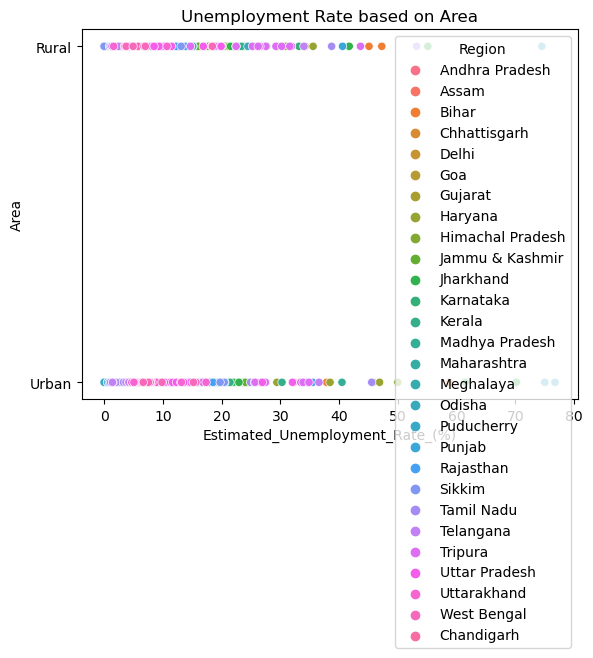

In [48]:
plt.title('Unemployment Rate based on Area')
sns.scatterplot(y=unemployment['Area'],x=unemployment['Estimated_Unemployment_Rate_(%)'],hue=unemployment['Region'])